**`Movie Performance analysis from 2000 - 2009 and 2010 - 2024`**
<li> **Box Office Trends**:
<li> **Market Analysis**:
<li> **Comparative Studies**:







In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [46]:
#2000 - 2009
df_bo1 = pd.read_csv('/content/2000-2009 Movies Box Ofice Collection.csv')
#2010 - 2024
df_bo2 = pd.read_csv('/content/2010-2024 Movies Box Ofice Collection.csv')

In [47]:
print(df_bo1.head())
print(df_bo2.head())

   Unnamed: 0           Release Group     Worldwide      Domestic  \
0           0  Mission: Impossible II  54,63,88,108  21,54,09,889   
1           1               Gladiator  46,05,83,960  18,77,05,427   
2           2               Cast Away  42,96,32,142  23,36,32,142   
3           3         What Women Want  37,41,11,707  18,28,11,707   
4           4                Dinosaur  34,98,22,765  13,77,48,063   

  Domestic_percent       Foreign Foreign_percent  year  
0           39.40%  33,09,78,219          60.60%  2000  
1           40.80%  27,28,78,533          59.20%  2000  
2           54.40%  19,60,00,000          45.60%  2000  
3           48.90%  19,13,00,000          51.10%  2000  
4           39.40%  21,20,74,702          60.60%  2000  
   Rank                                 Release Group       Worldwide  \
0     0                                   Toy Story 3  1,06,69,69,703   
1     1                           Alice in Wonderland  1,02,54,67,110   
2     2  Harry Potter an

In [48]:
(df_bo1.info())
(df_bo2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2000 non-null   int64 
 1   Release Group     2000 non-null   object
 2   Worldwide         2000 non-null   object
 3   Domestic          2000 non-null   object
 4   Domestic_percent  2000 non-null   object
 5   Foreign           2000 non-null   object
 6   Foreign_percent   2000 non-null   object
 7   year              2000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 125.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              2800 non-null   int64 
 1   Release Group     2800 non-null   object
 2   Worldwide         2800 non-null   object
 3   Domestic          2800 non-null   object


In [52]:
#Concatenate The dataframes
df = pd.concat([df_bo1, df_bo2], ignore_index=True)
df.head(10)
df.tail(10)

,Unnamed: 0,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year,Rank
4790,NaN,The Wandering Earth II,"88,54,786","50,23,132",56.70%,"38,31,654",43.30%,2023,190.0
4791,NaN,Father & Soldier,"85,98,322",0,0,"85,98,322",100%,2023,191.0
4792,NaN,PreCure All Stars F,"85,57,763",0,0,"85,57,763",100%,2023,192.0
4793,NaN,Dream,"83,17,251",0,0,"83,17,251",100%,2023,193.0
4794,NaN,Vacaciones de verano,"82,09,854",0,0,"82,09,854",100%,2023,194.0
4795,NaN,On the Wandering Paths,"81,87,125",0,0,"81,87,125",100%,2023,195.0
4796,NaN,Weekend Rebels,"81,84,539",0,0,"81,84,539",100%,2023,196.0
4797,NaN,Ransomed,"81,01,634","1,42,101",1.80%,"79,59,533",98.20%,2023,197.0
4798,NaN,Checker Tobi und die Reise zu den fliegenden F...,"79,53,344",0,0,"79,53,344",100%,2023,198.0
4799,NaN,The Silent Service,"78,36,539",0,0,"78,36,539",100%,2023,199.0


**Data Preprocessing and Data Cleaning**
<li> Handling missing values
<li> Dropping redundant columns
<li> Making numeric Columns integer

In [53]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [54]:
df.isnull().sum()
df['Rank'].fillna(0, inplace = True)
df['Domestic_percent'].fillna(0, inplace=True)
df['Foreign_percent'].fillna(0, inplace=True)

In [55]:
df['Worldwide'] = df['Worldwide'].astype(str)
df['Worldwide'] =df['Worldwide'].str.replace(',', '').astype(int)

df['Domestic'] = df['Domestic'].astype(str)
df['Domestic'] =df['Domestic'].str.replace(',', '').astype(int)

df['Foreign'] = df['Foreign'].astype(str)
df['Foreign'] = df['Foreign'].str.replace(',', '').astype(int)

df['Domestic_percent'] = df['Domestic_percent'].astype(str)
df['Foreign_percent'] = df['Foreign_percent'].astype(str)

df['Domestic_percent'] = pd.to_numeric(df['Domestic_percent'].str.replace('%', ''), errors='coerce')
df['Foreign_percent'] = pd.to_numeric(df['Foreign_percent'].str.replace('%', ''), errors='coerce')


Exploratory Data Analysis:
<li> Yearly Trends: Yearly Earnings (Aggregate)
<li> Top Performers: Movies with highest earnings
<li> Contribution: Domestic and Foreign

In [56]:
df.describe()

,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year,Rank
count,4.800000e+03,4.800000e+03,4798.000000,4.800000e+03,4795.000000,4800.000000,4800.000000
mean,1.197653e+08,4.496957e+07,35.815256,7.479538e+07,64.263816,2011.500000,58.041667
std,1.997365e+08,7.661305e+07,30.517831,1.330796e+08,30.462974,6.922908,65.966758
min,1.708839e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000,0.000000
25%,2.538121e+07,1.307395e+05,0.300000,1.438244e+07,42.400000,2005.750000,0.000000
50%,4.954631e+07,1.874263e+07,37.100000,3.070077e+07,63.000000,2011.500000,28.000000
75%,1.206114e+08,5.460851e+07,57.700000,7.282163e+07,99.700000,2017.250000,114.000000
max,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000,2023.000000,199.000000


In [57]:
Yearly_trends = df.groupby('year')[['Worldwide', 'Domestic', 'Foreign']].sum()
Yearly_trends

,Worldwide,Domestic,Foreign
year,,,
2000,13936536887,7618554125,6317982762
2001,16134416061,8046274300,8088141761
2002,17771913045,9064565070,8707347947
2003,18765295426,8906811608,9858461727
2004,19459387912,8903251537,10556088300
2005,18916200390,8571513028,10344687230
2006,19919329668,8671297157,11248022778
2007,22316670273,9382397255,12934268161
2008,23253653980,9420629714,13832978129


In [58]:
Top_performers = df.sort_values(by = 'Worldwide', ascending = False)
Top_performers.head(10)

,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year,Rank
3800,Avengers: Endgame,2799439100,858373000,30.7,1941066100,69.3,2019,0.0
1800,Avatar,2743577587,749766139,27.3,1993811448,72.7,2009,0.0
4400,Avatar: The Way of Water,2320250281,684075767,29.5,1636174514,70.5,2022,0.0
3000,Star Wars: Episode VII 0 The Force Awakens,2068223624,936662225,45.3,1131561399,54.7,2015,0.0
3600,Avengers: Infinity War,2048359754,678815482,33.1,1369544272,66.9,2018,0.0
4200,Spider0Man: No Way Home,1912233593,804793477,42.1,1107440116,57.9,2021,0.0
3001,Jurassic World,1670400637,652270625,39.0,1018130012,61.0,2015,1.0
3801,The Lion King,1656943394,543638043,32.8,1113305351,67.2,2019,1.0
2400,The Avengers,1518812988,623357910,41.0,895455078,59.0,2012,0.0
3002,Furious 7,1515047671,353007020,23.3,1162040651,76.7,2015,2.0


In [59]:
contribution = df.groupby('year')[['Domestic_percent', 'Foreign_percent']].mean()
contribution

,Domestic_percent,Foreign_percent
year,,
2000,62.298995,38.012000
2001,51.969500,48.271357
2002,52.874500,47.125500
2003,46.007500,53.992500
2004,45.805500,54.194500
2005,42.443216,58.059296
2006,41.818500,58.768687
2007,39.677000,60.323000
2008,37.360500,62.953266


**Box Office Trends**
<li> Visualize the Yearly trends
<li> Top Performers

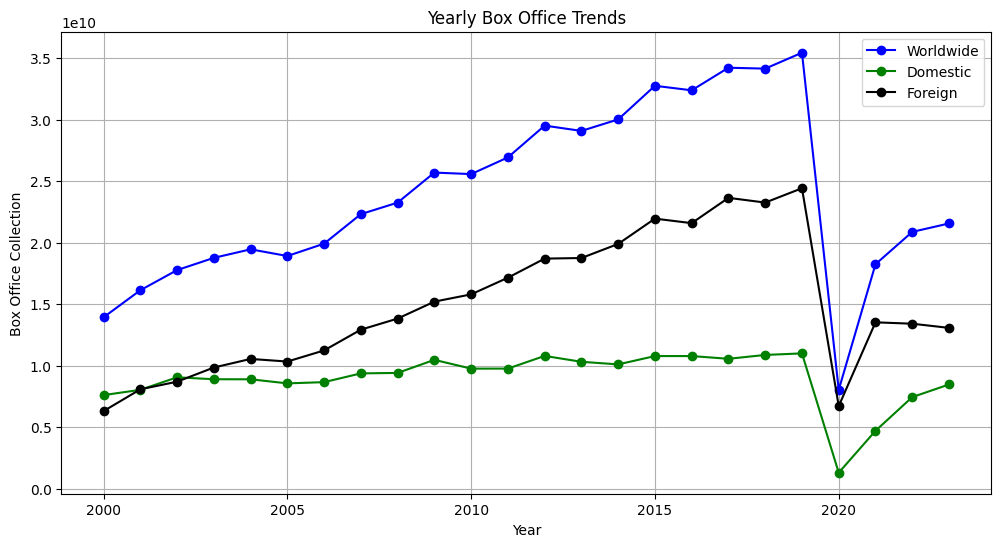

In [60]:
#Yearly Study and Visula Analysis of movies from 2000 - 2024
plt.figure(figsize= (12, 6))
plt.plot(Yearly_trends.index, Yearly_trends['Worldwide'], label = 'Worldwide', marker = 'o', color = 'blue')
plt.plot(Yearly_trends.index, Yearly_trends['Domestic'], label = 'Domestic', marker = 'o', color = 'green')
plt.plot(Yearly_trends.index, Yearly_trends['Foreign'], label = 'Foreign', marker = 'o', color = 'black')

plt.title('Yearly Box Office Trends')
plt.xlabel('Year')
plt.ylabel('Box Office Collection')
plt.legend()
plt.grid(True)
plt.show()

**Market Analysis**

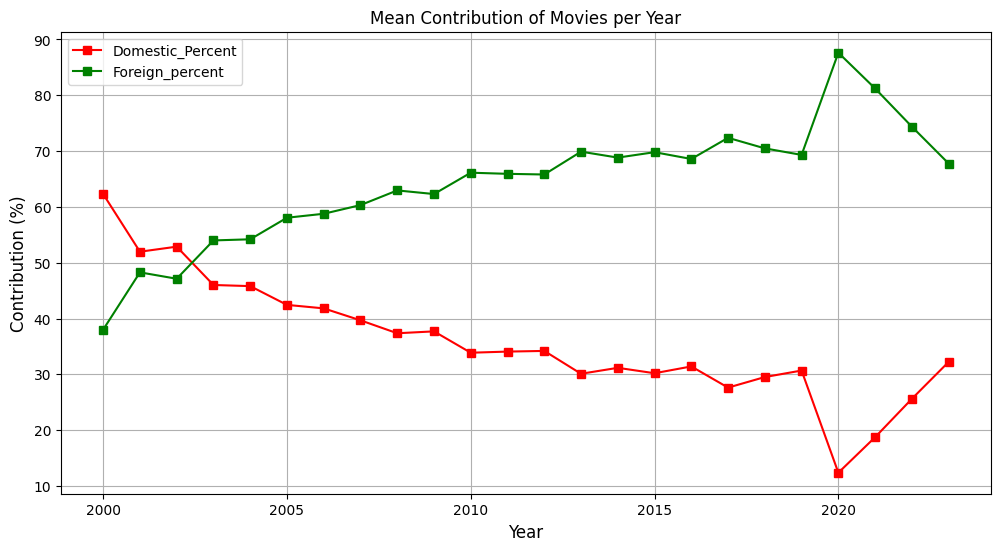

In [73]:
#Mean Contributions of Movies per year
plt.figure(figsize=(12, 6))
plt.plot(contribution.index, contribution['Domestic_percent'], label ='Domestic_Percent', marker = 's', color = 'red')
plt.plot(contribution.index, contribution['Foreign_percent'], label = 'Foreign_percent', marker = 's' , color = 'green')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Contribution (%)', fontsize = 12)
plt.title('Mean Contribution of Movies per Year')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Disproportionate contributions
threshold = 0.7  # 70%

dominant_domestic = df[df['Domestic_percent'].astype(float) >= threshold * 100]
dominant_foreign = df[df['Foreign_percent'].astype(float) >= threshold * 100]

print("Dominant Domestic Movies/Years:")
print(dominant_domestic[['Release Group', 'year', 'Domestic_percent', 'Foreign_percent']].head())

print("\nDominant Foreign Movies/Years:")
print(dominant_foreign[['Release Group', 'year', 'Domestic_percent', 'Foreign_percent']].head())

Dominant Domestic Movies/Years:
                     Release Group  year  Domestic_percent  Foreign_percent
5   How the Grinch Stole Christmas  2000              75.4             24.6
25  Nutty Professor II: The Klumps  2000              74.1             25.9
30             Remember the Titans  2000              84.6             15.4
32                   Space Cowboys  2000              70.2             29.8
45                Rugrats in Paris  2000              74.1             25.9

Dominant Foreign Movies/Years:
         Release Group  year  Domestic_percent  Foreign_percent
29           The Beach  2000              27.6             72.4
41        Billy Elliot  2000              20.1             79.9
66              Taxi 2  2000               1.0             99.0
82            The Gift  2000              26.9             73.1
86  Dancer in the Dark  2000              10.5             89.5


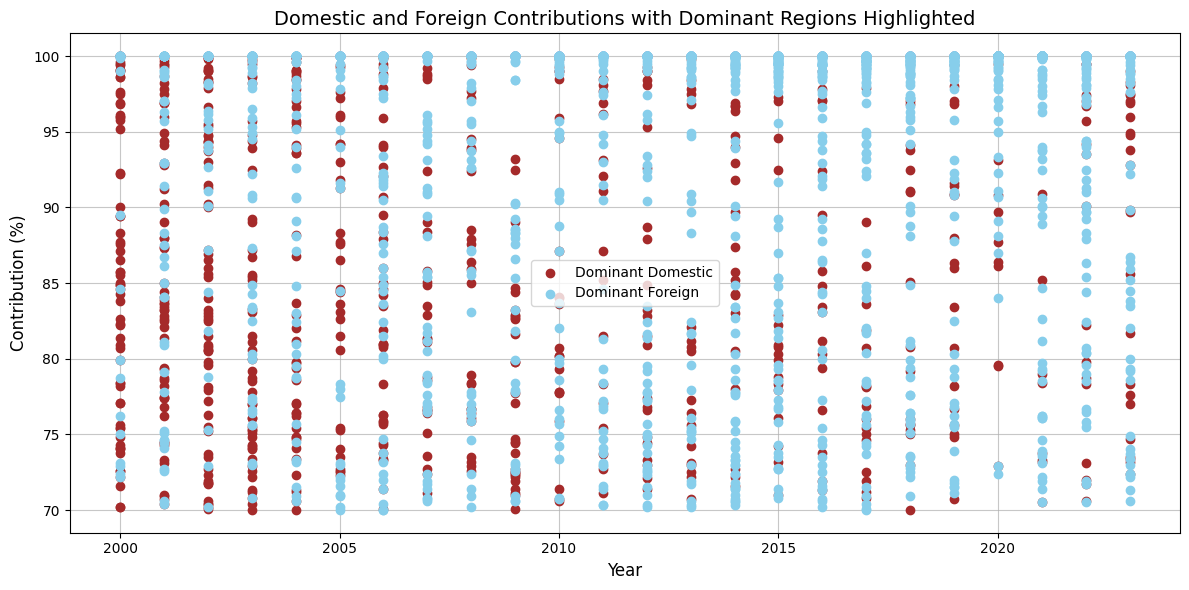

In [92]:
plt.figure(figsize=(12, 6))

plt.scatter(dominant_domestic['year'], dominant_domestic['Domestic_percent'], color='brown', label='Dominant Domestic', zorder=5)
plt.scatter(dominant_foreign['year'], dominant_foreign['Foreign_percent'], color='skyblue', label='Dominant Foreign', zorder=5)
plt.title('Domestic and Foreign Contributions with Dominant Regions Highlighted', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


**Comparative Studies**

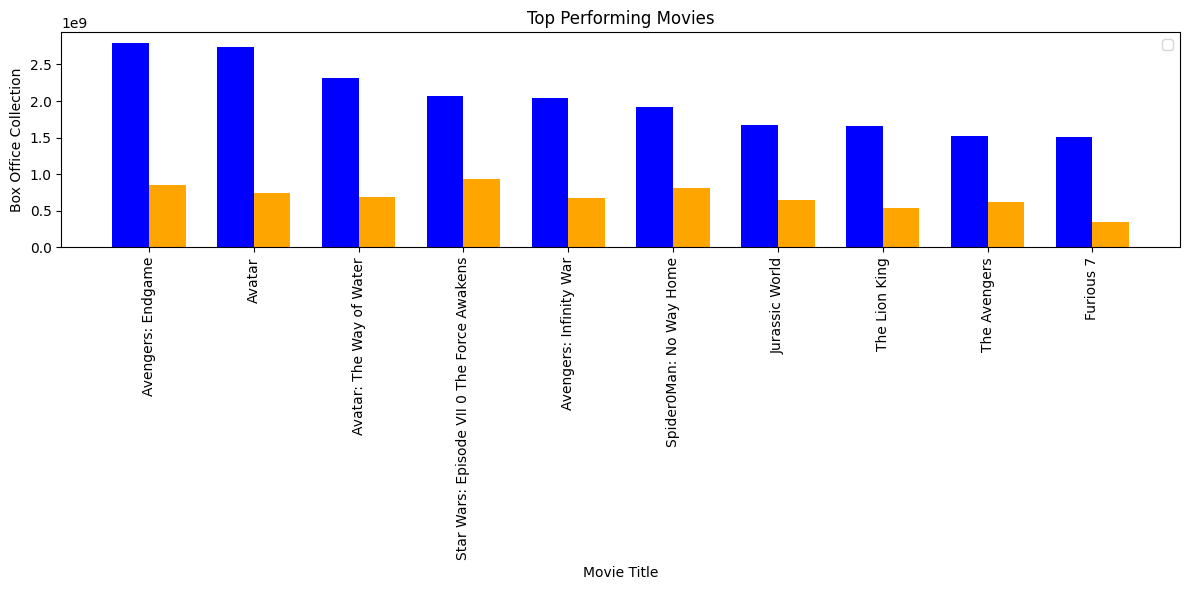

In [74]:
#Top 10 performing movies for Two Decades
top10_performers = Top_performers.head(10)
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(top10_performers['Release Group']))
plt.bar(index, top10_performers['Worldwide'], bar_width, label='Worldwide', color='blue')
plt.bar(index + bar_width, top10_performers['Domestic'], bar_width, label='Domestic', color='orange')
plt.xlabel('Movie Title')
plt.ylabel('Box Office Collection')
plt.title('Top Performing Movies')
plt.legend(['Worldwide'], ['Domestic'])
plt.xticks(index + bar_width / 2, top10_performers['Release Group'], rotation=90)
plt.tight_layout()
plt.show()

In [78]:
Low_performers = df.sort_values(by = 'Worldwide', ascending = True)
Low_performers.head(10)


,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year,Rank
199,The Girl on the Bridge,1708839,1708839,100.0,0,0.0,2000,0.0
198,The Life and Times of Hank Greenberg,1712385,1712385,100.0,0,0.0,2000,0.0
197,Cecil B. Demented,1961544,1284646,65.5,676898,34.5,2000,0.0
196,The Broken Hearts Club: A Romantic Comedy,2019121,1746585,86.5,272536,13.5,2000,0.0
195,Hamlet,2046433,1577287,77.1,469146,22.9,2000,0.0
194,Marlene,2061924,0,0.0,2061924,100.0,2000,0.0
193,Blood Simple 2000 Re0release,2068701,1701855,82.3,366846,17.7,2000,0.0
192,Left Luggage,2111280,1069540,50.7,1041740,49.3,2000,0.0
191,Shower,2150929,1157764,53.8,993165,46.2,2000,0.0
190,East/West,2321029,2321029,100.0,0,0.0,2000,0.0


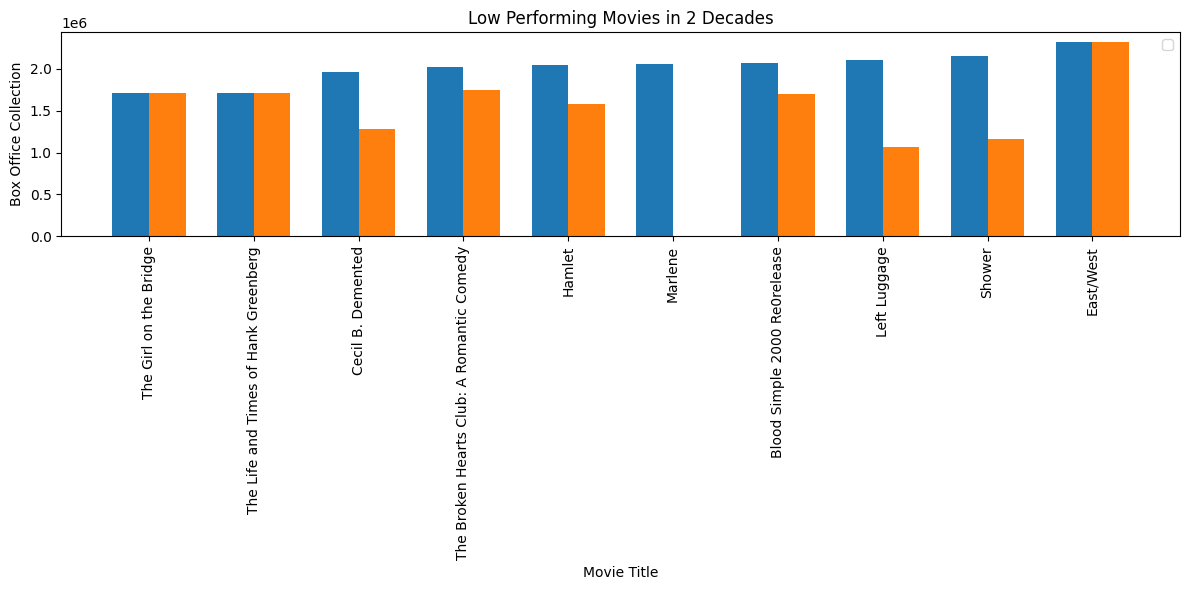

In [80]:
#Top 10 performing movies for Two Decades
low10_performers = Low_performers.head(10)
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(top10_performers['Release Group']))
plt.bar(index, low10_performers['Worldwide'], bar_width, label='Worldwide')
plt.bar(index + bar_width, low10_performers['Domestic'], bar_width, label='Domestic')
plt.xlabel('Movie Title')
plt.ylabel('Box Office Collection')
plt.title('Low Performing Movies in 2 Decades')
plt.legend(['Worldwide'], ['Domestic'])
plt.xticks(index + bar_width / 2, low10_performers['Release Group'], rotation=90)
plt.tight_layout()
plt.show()

In [89]:
#Ranking of the Movie and its box office
# Correlation
correlation = df[['Rank', 'Worldwide', 'Domestic', 'Foreign']].corr()
print(correlation)


               Rank  Worldwide  Domestic   Foreign
Rank       1.000000  -0.298928 -0.329501 -0.258966
Worldwide -0.298928   1.000000  0.916655  0.973169
Domestic  -0.329501   0.916655  1.000000  0.800097
Foreign   -0.258966   0.973169  0.800097  1.000000


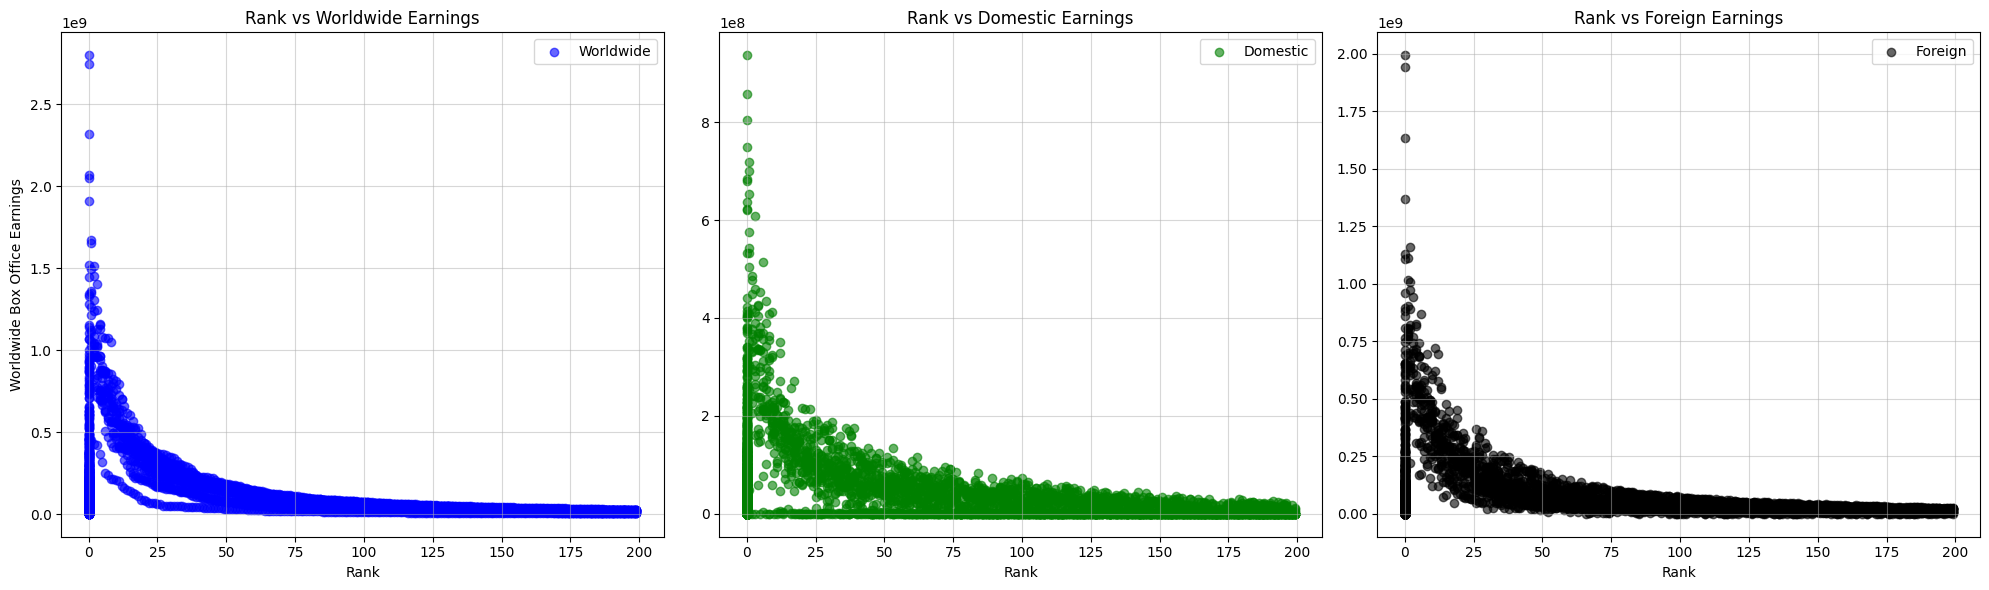

In [91]:
# Create a figure with subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Scatter plot for Rank vs Worldwide Earnings
axes[0].scatter(df['Rank'], df['Worldwide'], alpha=0.6, color='blue', label='Worldwide')
axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Worldwide Box Office Earnings')
axes[0].set_title('Rank vs Worldwide Earnings')
axes[0].grid(alpha=0.5)
axes[0].legend()

# Scatter plot for Rank vs Domestic Earnings
axes[1].scatter(df['Rank'], df['Domestic'], alpha=0.6, color='green', label='Domestic')
axes[1].set_xlabel('Rank')
axes[1].set_title('Rank vs Domestic Earnings')
axes[1].grid(alpha=0.5)
axes[1].legend()

# Scatter plot for Rank vs Foreign Earnings
axes[2].scatter(df['Rank'], df['Foreign'], alpha=0.6, color='black', label='Foreign')
axes[2].set_xlabel('Rank')
axes[2].set_title('Rank vs Foreign Earnings')
axes[2].grid(alpha=0.5)
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()



Overall Evaluation and Analysis of the Movies and their performance throughout the respective released year shows that the following movies had highest box office collection:
<li> Avengers: Endgame
<li> Avatar

Top Performing movies for the year were movies that had highest box office collection. Movies that have done well in domestic cinema halls has not performed that well in international halls. Also, despite having no or lesser domestic performances, international viewers have picked up some movies unexpectedly well. Moreover, with more than 2000 missing values in rank column of the data, for available data it also suggests that the ranking of the movies does not necessarily mean the movie performed well in box office . However, there is positive correlation between the movie having highest gross amount to rank of the movie.